In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import networkx as nx
import graphreadability as gr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = [5, 5]

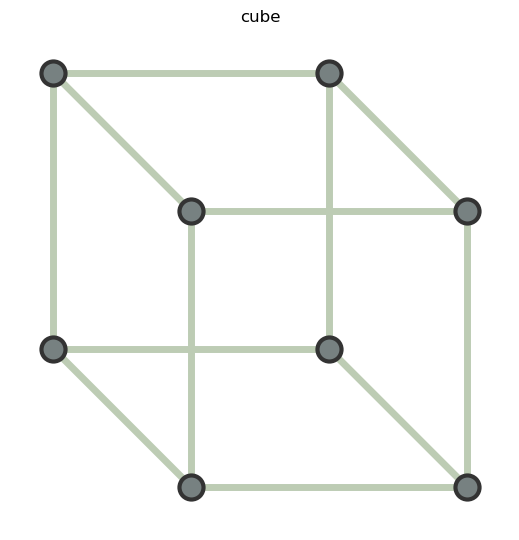

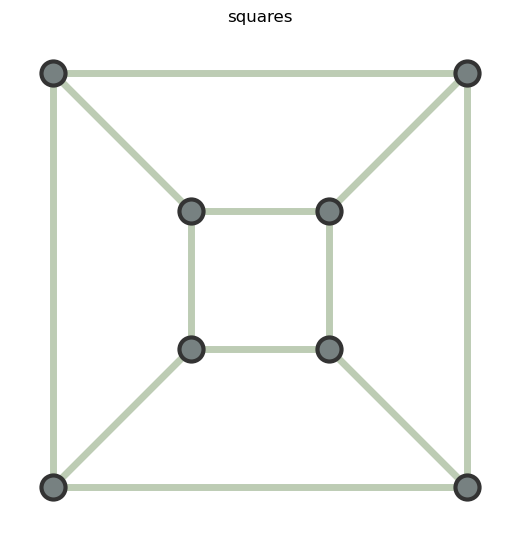

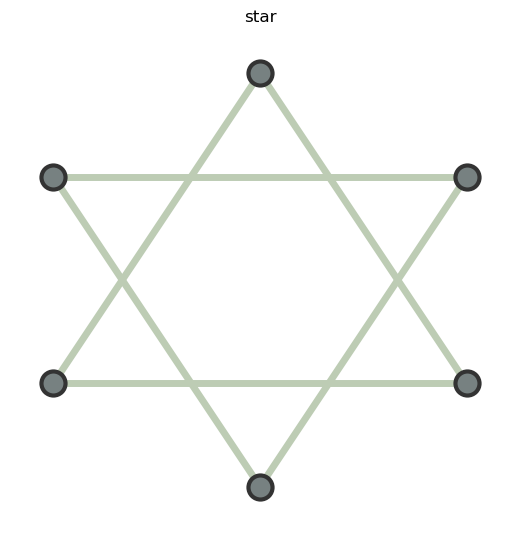

In [4]:
# Read all .graphml files from the ../tests/test_data directory
test_data_dir = "../graphreadability/tests/test_data/"
Gs = {}
for file in sorted(os.listdir(test_data_dir)):
    if file.endswith(".graphml"):
        Gs[file[:-8]] = nx.read_graphml(os.path.join(test_data_dir, file))

# Draw all graphs
for name, G in Gs.items():
    gr.helpers.draw_graph(G)
    plt.title(name)
    plt.show()

In [5]:
Ms = {name: gr.MetricsSuite(G) for name, G in Gs.items()}
for name, M in Ms.items():
    print(f"Calculating metrics for {name}")
    M.calculate_metrics()
    M.pretty_print_metrics()

Calculating metrics for cube
--------------------------------------------------
Metric                        Value	Weight
--------------------------------------------------
angular_resolution            0.531	1
aspect_ratio                  1.000	1
crossing_angle                1.000	1
edge_crossing                 0.889	1
edge_length                   0.856	1
edge_orthogonality            0.667	1
gabriel_ratio                 0.812	1
neighbourhood_preservation    0.455	1
node_orthogonality            0.500	1
node_resolution               0.333	1
node_uniformity               1.000	1
--------------------------------------------------
Evaluation using weighted_sum: 0.73118
--------------------------------------------------
Calculating metrics for squares
--------------------------------------------------
Metric                        Value	Weight
--------------------------------------------------
angular_resolution            0.578	1
aspect_ratio                  1.000	1
crossing_angle

In [6]:
# Draw a grouped bar chart of the metrics
metric_tables = pd.DataFrame.from_records([M.metric_table(calculate=True) for M in Ms.values()], index=Ms.keys())
metric_tables.index.name = "Graph"
metric_tables

,angular_resolution,aspect_ratio,crossing_angle,edge_crossing,edge_length,edge_orthogonality,gabriel_ratio,neighbourhood_preservation,node_orthogonality,node_resolution,node_uniformity,combined
Graph,,,,,,,,,,,,
cube,0.531250,1.00,1.000000,0.888889,0.855741,0.666667,0.8125,0.454545,0.500000,0.333333,1.00,0.731175
squares,0.578125,1.00,1.000000,1.000000,0.558472,0.666667,0.8750,0.454545,0.500000,0.235702,1.00,0.715319
star,0.333333,0.87,0.330806,1.000000,0.998475,0.553871,0.7500,0.000000,0.000171,0.498284,0.75,0.553176


<AxesSubplot: xlabel='Value', ylabel='Metric'>

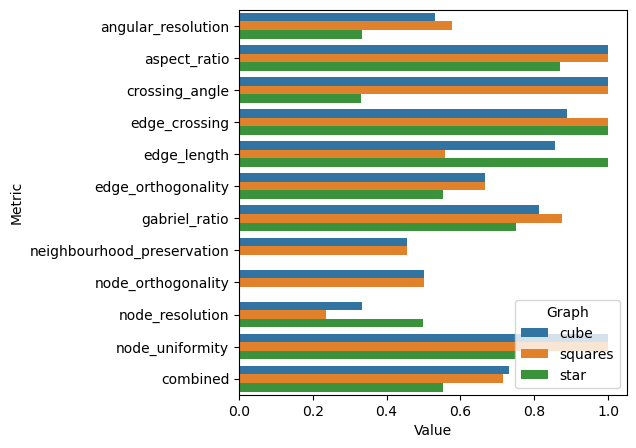

In [7]:
sns.barplot(data=metric_tables.reset_index().melt(id_vars=["Graph"], var_name="Metric", value_name="Value"), x="Value", y="Metric", hue="Graph", orient="h")

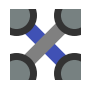

In [50]:
G_cross = nx.Graph()
G_cross.add_nodes_from([
    (0, {"x": 0, "y": 0}),
    (1, {"x": 1, "y": 1}),
    (2, {"x": 0, "y": 1}),
    (3, {"x": 1, "y": 0}),
])
G_cross.add_edges_from([(0, 1), (2, 3)])
# Create a 256x256 logo
fig, ax = plt.subplots(figsize=(1,1))
gr.helpers.draw_graph(
    G_cross,
    ax=ax, 
    edge_color=['#4051B5', 'grey'], 
    # node_color=['crimson','crimson','b','b'],
    node_size=600,
    width=10,
    linewidths=5,
    )
# Get rid of the margin
fig.tight_layout()
fig.savefig("../docs/assets/logo_128.png", pad_inches=0, transparent=True, bbox_inches=0, dpi=128)
fig.savefig("../docs/assets/logo_512.png", pad_inches=0, transparent=True, bbox_inches=0, dpi=512)